In [7]:
# importing packages

import numpy as np
import os
import time
from dask import dataframe as dd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import vitaldb
import csv
from datetime import datetime, time as datetime_time, timedelta
import glob
import sys
import sklearn.neighbors._base

In [6]:
import fancyimpute as fi

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
def getRootDir():
    """
    Get root folder directory
    :return: root folder directory
    :rtype: path
    """
    rootdir = os.path.abspath(os.curdir)

    return rootdir

In [5]:
rootdir = getRootDir()
rootdir

'/Users/tselanna/Desktop/Code'

In [8]:
# Import edited merged dataset
merged_df = glob.glob(os.path.join(
        rootdir, '*TOSHIBA_HDD/2022_06_20T13_36_10_Merged_edited.csv'))
merged_df = pd.read_csv(merged_df[0], dtype={"position": 'string', 'cormack':'string', 'airway':'string', 'aline1':'string', 'Solar8000/BT':float})
merged_df

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,aline1,intraop_ebl,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,88.0,96.0,NaN,0.0,NaN
2,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,88.0,96.0,NaN,0.0,NaN
4,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10421465,6385,2278,0,20640,-540,21000,-540,19800,-225600,1675200,0,0,69.0,1,159.3,62.3,24.6,2.0,0,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,Videoscopic,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,15.2,239.0,114.0,28.7,144.0,4.0,140.0,3.7,18.0,28.0,19.0,0.84,<NA>,<NA>,7.

In [24]:
merged_df.iloc[:,[24, 42, 43, 46]]

,position,cormack,airway,aline1
0,Lithotomy,I,Oral,Left radial
1,Lithotomy,I,Oral,Left radial
2,Lithotomy,I,Oral,Left radial
3,Lithotomy,I,Oral,Left radial
4,Lithotomy,I,Oral,Left radial
...,...,...,...,...
10421465,Lithotomy,NaN,NaN,Right radial
10421466,Lithotomy,NaN,NaN,Right radial
10421467,Lithotomy,NaN,NaN,Right radial
10421468,Lithotomy,NaN,NaN,Right radial


In [10]:
# Add variable with the seconds of the operation
merged_df['seconds'] = merged_df.groupby(['caseid']).cumcount()+1
merged_df

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,aline1,intraop_ebl,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,seconds
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,88.0,96.0,NaN,0.0,NaN,2
2,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,88.0,96.0,NaN,0.0,NaN,4
4,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10421465,6385,2278,0,20640,-540,21000,-540,19800,-225600,1675200,0,0,69.0,1,159.3,62.3,24.6,2.0,0,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,Videoscopic,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,15.2,239.0,114.0,28.7,144.0,4.0,140.0,3.7,18.0,28.0,

In [11]:
# Convert object type variables to categorical 
for col in ['department', 'optype', 'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_ecg', 'preop_pft', 
            'cormack', 'airway', 'iv1', 'aline1']:
    merged_df[col] = merged_df[col].astype('category')

In [12]:
merged_df.shape

(10421470, 90)

In [56]:
# Create a smaller dataset with 3 second intervals
small_df = merged_df.iloc[::3, :]
small_df

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,aline1,intraop_ebl,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,seconds
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,88.0,96.0,NaN,0.0,NaN,4
6,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
9,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,89.0,96.0,NaN,0.0,NaN,10
12,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10421457,6385,2278,0,20640,-540,21000,-540,19800,-225600,1675200,0,0,69.0,1,159.3,62.3,24.6,2.0,0,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,Videoscopic,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,15.2,239.0,114.0,28.7,144.0,4.0,140.0,3.7,18.

In [69]:
small_df.caseid.nunique()

849

In [68]:
# first delete cases with >65% NaN
index_names = small_df[small_df['caseid'].isin(to_drop)].index
small_df = small_df.drop(index_names) 
small_df.shape

(2696130, 90)

In [17]:
# Missing percentage per column in the original dataset
percent_missing = merged_df.isnull().sum() * 100 / len(merged_df)
missing_value_df = pd.DataFrame({'column_name': merged_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
caseid,caseid,0.000000
subjectid,subjectid,0.000000
casestart,casestart,0.000000
caseend,caseend,0.000000
anestart,anestart,0.000000
aneend,aneend,0.000000
opstart,opstart,0.000000
opend,opend,0.000000
adm,adm,0.000000
dis,dis,0.000000


In [70]:
# Missing percentage per column in the smaller dataset
percent_missing = small_df.isnull().sum() * 100 / len(small_df)
missing_value_df_small = pd.DataFrame({'column_name': small_df.columns,
                                 'percent_missing': percent_missing})
missing_value_df_small

,column_name,percent_missing
caseid,caseid,0.000000
subjectid,subjectid,0.000000
casestart,casestart,0.000000
caseend,caseend,0.000000
anestart,anestart,0.000000
aneend,aneend,0.000000
opstart,opstart,0.000000
opend,opend,0.000000
adm,adm,0.000000
dis,dis,0.000000


In [20]:
# Convert to NaN all the values in "Solar8000/NIBP_MBP" out of normal ranges
to_drop = [number for number in small_df["Solar8000/NIBP_MBP"] if number > 200]

In [22]:
to_drop = [number for number in small_df["Solar8000/NIBP_MBP"] if number < 30]

In [23]:
small_df["Solar8000/NIBP_MBP"].replace(to_drop, np.nan, inplace=True)

In [26]:
small_df["Solar8000/NIBP_MBP"].min()

30.0

In [28]:
# Convert to NaN all the values in "Solar8000/NIBP_SBP" out of normal ranges
to_drop = [number for number in small_df["Solar8000/NIBP_SBP"] if number < 50]

In [29]:
small_df["Solar8000/NIBP_SBP"].replace(to_drop, np.nan, inplace=True)

In [30]:
small_df["Solar8000/NIBP_SBP"].min()

50.0

In [ ]:
small_df['Solar8000/NIBP_SBP'].isna().sum()

In [32]:
# Convert to NaN all the values in "Solar8000/NIBP_DBP" out of normal ranges
to_drop = [number for number in small_df["Solar8000/NIBP_DBP"] if number > 160]

In [33]:
small_df["Solar8000/NIBP_DBP"].replace(to_drop, np.nan, inplace=True)

In [34]:
small_df["Solar8000/NIBP_DBP"].max()

159.0

In [35]:
# Heart rate variable
small_df['Solar8000/HR'].max()

240.0

In [15]:
# Convert to NaN all the values in "Solar8000/HR" out of normal ranges
to_drop = [number for number in small_df["Solar8000/HR"] if number > 240]

In [10]:
to_drop = [number for number in small_df["Solar8000/HR"] if number < 40]

In [16]:
small_df["Solar8000/HR"].replace(to_drop, np.nan, inplace=True)

In [38]:
# Convert to NaN all the values in "Solar8000/PLETH_HR" out of normal ranges
to_drop = [number for number in small_df["Solar8000/PLETH_HR"] if number > 250]

In [43]:
to_drop = [number for number in small_df["Solar8000/PLETH_HR"] if number < 40]

In [44]:
small_df["Solar8000/PLETH_HR"].replace(to_drop, np.nan, inplace=True)

In [37]:
small_df["Solar8000/PLETH_HR"].value_counts()

62.0     50727
66.0     50498
63.0     50400
64.0     48288
60.0     47806
67.0     47331
69.0     46854
61.0     45925
65.0     45572
59.0     44297
70.0     43818
71.0     43542
68.0     42292
72.0     39607
57.0     39460
58.0     38357
73.0     38155
74.0     37713
75.0     37117
56.0     36369
76.0     33854
77.0     33148
78.0     31523
79.0     30894
55.0     29526
80.0     29479
54.0     27853
81.0     26366
82.0     25490
53.0     24704
84.0     23794
86.0     23206
52.0     22296
83.0     21958
85.0     20739
87.0     19847
51.0     19382
88.0     18787
89.0     17620
91.0     15949
50.0     15855
93.0     14814
90.0     14195
92.0     13645
94.0     12724
49.0     12717
95.0     11358
96.0     10907
48.0     10597
98.0      9352
47.0      8808
97.0      8549
99.0      8264
46.0      7022
100.0     6368
101.0     6058
102.0     5394
103.0     5323
104.0     5025
45.0      4772
105.0     4687
106.0     4490
107.0     4267
108.0     4144
44.0      3255
109.0     3177
110.0     

In [45]:
small_df["Solar8000/PLETH_HR"].min()

40.0

In [63]:
# Export small dataset

csv_filename = os.path.join(
            "TOSHIBA_HDD", f'{datetime.now().strftime("%Y_%m_%dT%H_%M_%S")}_small_df.csv')
small_df.to_csv(csv_filename, encoding='utf-8-sig', index=False)

In [8]:
# Import small dataset
small_df = glob.glob(os.path.join(
        rootdir, 'TOSHIBA_HDD/2022_06_24T11_11_11_small_df.csv'))
small_df = pd.read_csv(small_df[0])

/Users/tselanna/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Interpolation

In [17]:
# Define a function that performs all types of interpolation

def imputInterp(rootdir, df, method):
    """Imputation techniques"""
    dfs_imp = []
    neighbors = 10

    pID = df['caseid']

    for i in pID.unique():
        cond = df[pID == i]
        df_pat = cond.dropna(how='all', axis=1)
        col = df_pat.columns

        # Interpolation methods
        """Interpolation with different techniques - linear, pad, nearest, polynomial (order=2), spline (order=5), cubic,
    krogh (too slow), piecewise_polynomial, pchip, akima, cubicspline, from_derivatives"""
        if method == "Linear":
            df_lin_interp = df_pat.interpolate(
                method='linear', axis=0).ffill().bfill()
            df_lin_interp = pd.DataFrame(df_lin_interp, columns=col)
            dfs_imp.append(df_lin_interp)
        elif method == "Iterative":
            df_iter_imp = fi.IterativeImputer().fit_transform(df_pat)
            df_iter_imp = pd.DataFrame(df_iter_imp, columns=df_pat.columns)
            dfs_imp.append(df_iter_imp)

    df_imputation = pd.concat(dfs_imp)
    return df_imputation


In [18]:
# Impute the original merged  dataset 
imp_df = imputInterp(rootdir, merged_df, method="Linear")

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got linear

In [11]:
# Impute the smaller dataset created above
new_imp = imputInterp(rootdir, small_df, method="Linear")

In [12]:
new_imp

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,aline1,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,seconds,intraop_ebl
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,7.0,100.0,0.0,21.000000,30.0,89.0,95.0,87.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,1,NaN
1,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,7.0,100.0,0.0,21.000000,30.0,89.0,95.0,87.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,4,NaN
2,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,7.0,100.0,0.0,21.000000,30.0,89.0,95.0,87.5,1.0,84.0,100.0,150.0,88.5,96.0,5.0,0.0,18.0,7,NaN
3,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,7.0,100.0,0.0,21.000000,30.0,89.0,95.0,88.0,1.0,84.0,100.0,150.0,89.0,96.0,5.0,0.0,18.0,10,NaN
4,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,7.0,100.0,0.0,21.000000,30.0,89.0,95.0,89.0,1.0,84.0,100.0,150.0,89.5,96.5,5.0,0.0,18.0,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473819,6385,2278,0,20640,-540,21000,-540,19800,-225600,1675200,0,0,69.0,1,159.3,62.3,24.6,2.0,0,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,Vide

In [23]:
print(new_imp.isnull().sum())

caseid                   0
subjectid                0
casestart                0
caseend                  0
anestart                 0
aneend                   0
opstart                  0
opend                    0
adm                      0
dis                      0
icu_days                 0
death_inhosp             0
age                      0
sex                      0
height                   0
weight                   0
bmi                      0
asa                      0
emop                     0
department               0
optype                   0
dx                       0
opname                   0
approach                 0
position                 0
ane_type                 0
preop_htn                0
preop_dm                 0
preop_ecg                0
preop_pft                0
preop_hb                 0
preop_plt                0
preop_pt                 0
preop_aptt               0
preop_na                 0
preop_k                  0
preop_gluc               0
p

In [ ]:
# Replace preop NaN values with -1 since these can not be imputed by linear interpolation
new_imp= new_imp.fillna(-1)

In [64]:
imp_df= imp_df.fillna(-1)

In [ ]:
# Convert object type variables to categorical 
for col in ['department', 'optype', 'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_ecg', 'preop_pft', 
            'cormack', 'airway', 'iv1', 'aline1']:
    new_imp[col] = new_imp[col].astype('category')

In [25]:
# Export imputed dataset

csv_filename = os.path.join(
            "TOSHIBA_HDD", f'{datetime.now().strftime("%Y_%m_%dT%H_%M_%S")}_new_imputed_linear.csv')
new_imp.to_csv(csv_filename, encoding='utf-8-sig', index=False)

In [20]:
# Import newly imputed dataset
new_imp = glob.glob(os.path.join(
        rootdir, 'TOSHIBA_HDD/2022_06_24T11_30_31_new_imputed_linear.csv'))
new_imp = pd.read_csv(new_imp[0])

/Users/tselanna/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [48]:
# Import old imputed dataset
imp_df = glob.glob(os.path.join(
        rootdir, 'TOSHIBA_HDD/2022_06_20T14_52_58_imputed_linear.csv'))
imp_df = pd.read_csv(imp_df[0])

/Users/tselanna/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (24,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
new_imp.shape

(3473824, 90)

In [11]:
# Add a variable with the seconds of the operation
imp_df['seconds'] = imp_df.groupby(['caseid']).cumcount()+1
imp_df

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,aline1,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,intraop_ebl,seconds
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,2.0,0.0,100.0,0.0,20.900000,30.0,89.0,95.0,88.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,-1.0,1
1,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,2.0,0.0,100.0,0.0,20.900000,30.0,89.0,95.0,88.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,-1.0,2
2,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,2.0,0.0,100.0,0.0,20.900000,30.0,89.0,95.0,87.5,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,-1.0,3
3,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,2.0,0.0,100.0,0.0,20.950000,30.0,89.0,95.0,87.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,-1.0,4
4,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,2.0,0.0,100.0,0.0,21.000000,30.0,89.0,95.0,87.5,1.0,84.0,100.0,150.0,88.5,96.5,5.0,0.0,18.0,-1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10421465,6385,2278,0,20640,-540,21000,-540,19800,-225600,1675200,0,0,69.0,1,159.3,62.3,24.6,2.0,0,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,

In [22]:
# Investigate a particular case
imp_df[imp_df['caseid'].eq(6236)].tail(50)

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,aline1,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,intraop_ebl,seconds
10123221,6236,436,0,5820,-900,6120,1020,5520,-119580,226020,0,0,66.0,0,161.2,58.35,22.5,2.0,0,General surgery,Colorectal,Incisional hernia,Incisional hernia repair,Open,Supine,General,0,0,Normal Sinus Rhythm,Normal,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,I,Oral,7.0,Right forearm,-1,-1.0,0,0,-1.0,0,100,0.0,100,50,0,15,0,0,0,117.0,10.0,2.552083,0.0,0.0,20.0,20.0,0.0,0.0,0.0,4.0,100.0,5.0,33.299999,0.0,20.0,20.0,97.0,0.0,105.0,128.0,170.0,97.0,82.0,4.0,1.0,9.0,-1.0,5791
10123222,6236,436,0,5820,-900,6120,1020,5520,-119580,226020,0,0,66.0,0,161.2,58.35,22.5,2.0,0,General surgery,Colorectal,Incisional hernia,Incisional hernia repair,Open,Supine,General,0,0,Normal Sinus Rhythm,Normal,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,I,Oral,7.0,Right forearm,-1,-1.0,0,0,-1.0,0,100,0.0,100,50,0,15,0,0,0,117.0,10.0,2.552083,0.0,0.0,20.0,20.0,0.0,0.0,0.0,4.0,100.0,5.0,33.299999,0.0,20.0,20.0,97.0,0.0,105.0,128.0,170.0,97.0,82.0,4.0,1.0,9.0,-1.0,5792
10123223,6236,436,0,5820,-900,6120,1020,5520,-119580,226020,0,0,66.0,0,161.2,58.35,22.5,2.0,0,General surgery,Colorectal,Incisional hernia,Incisional hernia repair,Open,Supine,General,0,0,Normal Sinus Rhythm,Normal,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,I,Oral,7.0,Right forearm,-1,-1.0,0,0,-1.0,0,100,0.0,100,50,0,15,0,0,0,117.0,10.0,2.552083,0.0,0.0,20.0,20.0,0.0,0.0,0.0,4.0,100.0,5.0,33.299999,0.0,20.0,20.0,97.0,0.0,105.0,128.0,170.0,97.0,82.0,4.0,1.0,9.0,-1.0,5793
10123224,6236,436,0,5820,-900,6120,1020,5520,-119580,226020,0,0,66.0,0,161.2,58.35,22.5,2.0,0,General surgery,Colorectal,Incisional hernia,Incisional hernia repair,Open,Supine,General,0,0,Normal Sinus Rhythm,Normal,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,I,Oral,7.0,Right forearm,-1,-1.0,0,0,-1.0,0,100,0.0,100,50,0,15,0,0,0,117.0,10.0,2.552083,0.0,0.0,20.0,20.0,0.0,0.0,0.0,4.0,100.0,5.0,33.299999,0.0,20.0,20.0,97.0,0.0,105.0,128.0,170.0,97.0,82.0,4.0,1.0,9.0,-1.0,5794
10123225,6236,436,0,5820,-900,6120,1020,5520,-119580,226020,0,0,66.0,0,161.2,58.35,22.5,2.0,0,General surgery,Colorectal,Incisional hernia,Incisional hernia repair,Open,Supine,General,0,0,Normal Sinus Rhythm,Normal,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,I,Oral,7.0,Right forearm,-1,-1.0,0,0,-1.0,0,100,0.0,100,50,0,15,0,0,0,117.0,10.0,2.552083,0.0,0.0,20.0,20.0,0.0,0.0,0.0,4.0,100.0,5.0,33.299999,0.0,20.0,20.0,97.0,0.0,105.0,128.0,170.0,97.0,82.0,4.0,1.0,9.0,-1.0,5795
10123226,6236,436,0,5820,-900,6120,1020,5520,-119580,226020,0,0,66.0,0,161.2,58.35,22.5,2.0,0,General surgery,Colorectal,Incisional hernia,Incisional hernia repair,Open,Supine,General,0,0,Normal Sinus Rhythm,Normal,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,I,Oral,7.0,Right forearm,-1,-1.0,0,0,-1.0,0,100,0.0,100,50,0,15,0,0,0,117.0,10.0,2.552083,0.0,0.0,20.0,20.0,0.0,0.0,0.0,4.0,100.0,5.0,33.299999,0.0,20.0,20.0,97.0,0.0,105.0,128.0,170.0,97.0,82.0,4.0,1.0,9.0,-1.0,5796
10123227,6236,436,0,5820,-900,6120,1020,5520,-119580,226020,0,0,66.0,0,16

## PCA

In [69]:
# Perform PCA on caseid 1 only
case_1 = imp_df.loc[imp_df.caseid == 1,]
case_1 = case_1.select_dtypes(include='number')
case_1 = pd.DataFrame(case_1)
case_1.shape

(11542, 76)

In [70]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
data_scaler.fit(case_1)
scaled_data_frame = data_scaler.transform(case_1)

#Perform the principal component analysis transformation
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data_frame)

x_pca = pca.transform(scaled_data_frame)

print(x_pca.shape)
print(scaled_data_frame.shape)

(11542, 2)
(11542, 76)


Text(0, 0.5, 'Second Principal Component')

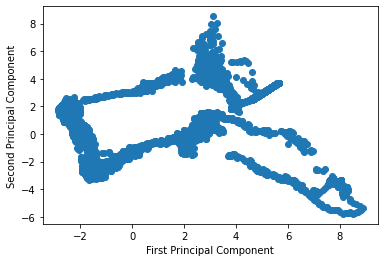

In [71]:
#Visualize the principal components
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [72]:
# Variance explained by the first 2 PC in caseid 1: 34% and 18%
pca.explained_variance_ratio_

array([0.34015163, 0.18846665])

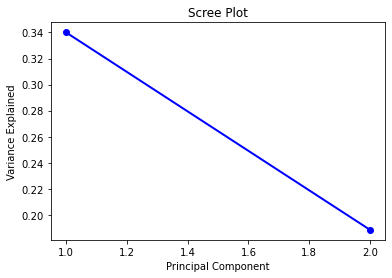

In [57]:
# TRy to plot a scree plot -not informative after all
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [73]:
# Perform PCA on caseid 18
case_2 = imp_df.loc[imp_df.caseid == 18,]
case_2 = case_2.select_dtypes(include='number')
case_2 = pd.DataFrame(case_2)
case_2.shape

(4416, 76)

(4416, 2)
(4416, 76)


array([0.32040504, 0.24977062])

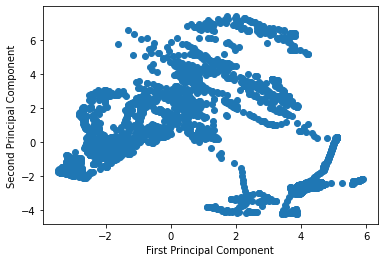

In [74]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
data_scaler.fit(case_2)
scaled_data_frame = data_scaler.transform(case_2)

#Perform the principal component analysis transformation
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data_frame)

x_pca = pca.transform(scaled_data_frame)

print(x_pca.shape)
print(scaled_data_frame.shape)

#Visualize the principal components
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

#Variance explained by the two principal components -32% and 24%
pca.explained_variance_ratio_

In [7]:
# Perform PCA on the whole imputed dataset
df = imp_df.copy()

In [8]:
# Only select variables constisitng of numerical values for the PCA 
df = df.select_dtypes(include='number')

In [9]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
data_scaler.fit(df)
scaled_data_frame = data_scaler.transform(df)

In [10]:
#Perform the principal component analysis transformation
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data_frame)

x_pca = pca.transform(scaled_data_frame)

print(x_pca.shape)
print(scaled_data_frame.shape)

(10421470, 2)
(10421470, 76)


Text(0, 0.5, 'Second Principal Component')

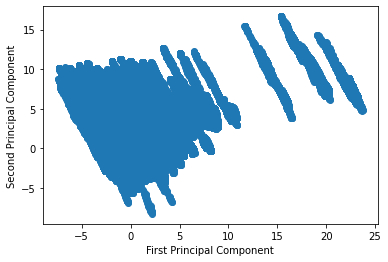

In [12]:
#Visualize the principal components
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [11]:
#Variance explained by the two principal components - 12% and 8%
pca.explained_variance_ratio_

array([0.1284678 , 0.08807184])

In [ ]:
# perform PCA on 10 cases on the full and imputed dataset

In [65]:
tencases = imp_df.loc[(imp_df.caseid == 1) | (imp_df.caseid == 18) | (imp_df.caseid == 21) | (imp_df.caseid == 30) | (imp_df.caseid == 33) | (imp_df.caseid == 50) | (imp_df.caseid == 57) | (imp_df.caseid == 62) | (imp_df.caseid == 63) | (imp_df.caseid == 71),]
tencases

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,aline1,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,intraop_ebl
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,2.0,0.0,100.0,0.0,20.900000,30.0,89.0,95.0,88.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,-1.0
1,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,2.0,0.0,100.0,0.0,20.900000,30.0,89.0,95.0,88.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,-1.0
2,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,2.0,0.0,100.0,0.0,20.900000,30.0,89.0,95.0,87.5,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,-1.0
3,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,2.0,0.0,100.0,0.0,20.950000,30.0,89.0,95.0,87.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,-1.0
4,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,2.0,0.0,100.0,0.0,21.000000,30.0,89.0,95.0,87.5,1.0,84.0,100.0,150.0,88.5,96.5,5.0,0.0,18.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95639,71,4721,0,6600,-540,6180,-540,5580,-243720,361080,0,0,61.0,1,165.5,66.9,24.4,2.0,0,General surgery,Colorectal,Rectal cancer,Ileostomy repair,Open,Supine,General,0,0,Normal Sinus Rhythm,Normal,-1.0,-1.0,-1.0,-1.0,

In [66]:
tencases = tencases.select_dtypes(include='number')

(95644, 2)
(95644, 76)


array([0.24508226, 0.15376747])

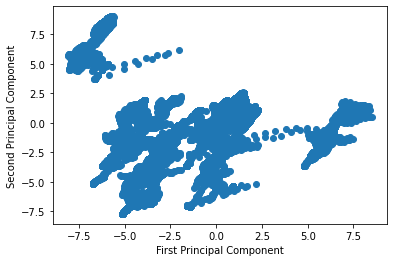

In [67]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
data_scaler.fit(tencases)
scaled_data_frame = data_scaler.transform(tencases)

#Perform the principal component analysis transformation
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data_frame)

x_pca = pca.transform(scaled_data_frame)

print(x_pca.shape)
print(scaled_data_frame.shape)

#Visualize the principal components
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


#Variance explained by the two principal components -32% and 24%
pca.explained_variance_ratio_

In [68]:
# perform PCA on 10 cases on the smaller and imputed dataset to compare
tencases_2 = new_imp.loc[(new_imp.caseid == 1) | (new_imp.caseid == 18) | (new_imp.caseid == 21) | (new_imp.caseid == 30) | (imp_df.caseid == 33) | (new_imp.caseid == 50) | (new_imp.caseid == 57) | (new_imp.caseid == 62) | (new_imp.caseid == 63) | (new_imp.caseid == 71),]
tencases_2

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,aline1,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,seconds,intraop_ebl
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.00,1.0,7.0,100.0,0.0,21.0,30.0,89.0,95.0,87.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,1,-1.0
1,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.00,1.0,7.0,100.0,0.0,21.0,30.0,89.0,95.0,87.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,4,-1.0
2,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.00,1.0,7.0,100.0,0.0,21.0,30.0,89.0,95.0,87.5,1.0,84.0,100.0,150.0,88.5,96.0,5.0,0.0,18.0,7,-1.0
3,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.00,1.0,7.0,100.0,0.0,21.0,30.0,89.0,95.0,88.0,1.0,84.0,100.0,150.0,89.0,96.0,5.0,0.0,18.0,10,-1.0
4,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.00,1.0,7.0,100.0,0.0,21.0,30.0,89.0,95.0,89.0,1.0,84.0,100.0,150.0,89.5,96.5,5.0,0.0,18.0,13,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46084,116,3965,0,12780,-1440,13200,3000,12000,-216000,648000,1,0,64.0,0,151.9,41.2,17.9,1.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Videoscopic,Lithotomy,General,0,0,Normal Sinus Rhythm,No

In [70]:
tencases_2 = tencases_2.select_dtypes(include='number')

(36094, 2)
(36094, 77)


array([0.24325867, 0.14475146])

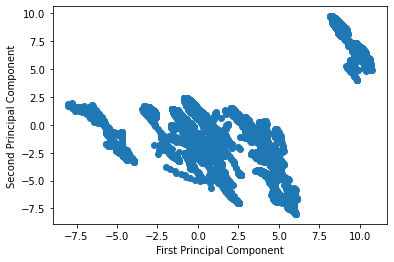

In [71]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
data_scaler.fit(tencases_2)
scaled_data_frame = data_scaler.transform(tencases_2)

#Perform the principal component analysis transformation
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data_frame)

x_pca = pca.transform(scaled_data_frame)

print(x_pca.shape)
print(scaled_data_frame.shape)

#Visualize the principal components
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


#Variance explained by the two principal components -32% and 24%
pca.explained_variance_ratio_

In [ ]:
# perform PCA on the smaller dataset, no significant difference in the variance explained 
# between original and smaller datasets

In [72]:
df = new_imp.copy()
df = df.select_dtypes(include='number')

(3473824, 2)
(3473824, 77)


array([0.13088386, 0.08711631])

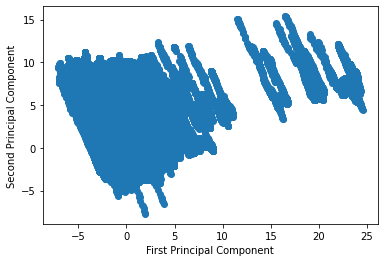

In [73]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
data_scaler = StandardScaler()
data_scaler.fit(df)
scaled_data_frame = data_scaler.transform(df)

#Perform the principal component analysis transformation
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(scaled_data_frame)

x_pca = pca.transform(scaled_data_frame)

print(x_pca.shape)
print(scaled_data_frame.shape)

#Visualize the principal components
plt.scatter(x_pca[:,0],x_pca[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')


#Variance explained by the two principal components 13% and 8%
pca.explained_variance_ratio_

## Recording frequency

In [21]:
np.set_printoptions(threshold=np.inf)

In [22]:
# These are all the unique caseids in the data
merged_df.caseid.unique()

array([   1,   18,   21,   30,   33,   50,   57,   62,   63,   71,   88,
         90,   95,  100,  109,  116,  124,  127,  129,  133,  135,  140,
        159,  166,  173,  174,  179,  192,  194,  196,  207,  211,  212,
        220,  223,  224,  228,  230,  238,  239,  240,  243,  245,  248,
        262,  269,  272,  288,  289,  292,  298,  302,  305,  311,  313,
        320,  323,  329,  331,  337,  340,  341,  346,  351,  356,  364,
        370,  376,  384,  410,  420,  424,  428,  429,  446,  454,  459,
        465,  471,  476,  477,  479,  482,  483,  487,  489,  498,  501,
        503,  504,  508,  511,  517,  525,  528,  529,  534,  535,  538,
        548,  551,  555,  556,  565,  569,  580,  581,  583,  588,  591,
        598,  600,  606,  608,  612,  613,  616,  618,  640,  647,  651,
        653,  664,  680,  681,  682,  687,  695,  696,  707,  710,  713,
        718,  724,  735,  739,  755,  780,  782,  799,  801,  804,  805,
        808,  820,  823,  830,  832,  834,  838,  8

In [24]:
merged_df[merged_df['caseid'].eq(1)].head(200)

# By investigating different cases  we see that not all Primus vitals was were recorded every 7 seconds, this varies a lot and 
# ranges from 5-8 seconds

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,aline1,intraop_ebl,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,seconds
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,88.0,96.0,NaN,0.0,NaN,2
2,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,88.0,96.0,NaN,0.0,NaN,4
4,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,NaN,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,89.0,97.0,NaN,0.0,NaN,6
6,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus

In [106]:
len(merged_df[merged_df['caseid'].eq(1)])

11542

In [104]:
merged_df[merged_df['caseid'].eq(6236)].shape

(5840, 89)

In [107]:
merged_df.isna().sum().sum()

183769572

## Plotting Vitals

In [99]:
# Create a function that plots vitals according to caseid
def plot_df(df1, vital, caseid):
    df = df1.loc[df1.caseid == caseid]
    x = df.index
    plt.figure(figsize= (30, 20))
    plt.plot(x, df1.loc[df1.caseid == caseid][vital], c='r', linestyle='solid')
    plt.scatter(x, df1.loc[df1.caseid == caseid][vital])
    plt.title(vital + '-' + str(caseid) +  '.png', fontsize=30, fontweight='bold')
    plt.ylim(0, 200)
    plt.yticks(fontsize=20)
    plt.ylabel('bpm', fontsize=50)
    plt.xticks(fontsize=20)
    
    plt.xlabel("seconds", fontsize=50)
    plt.show()
   

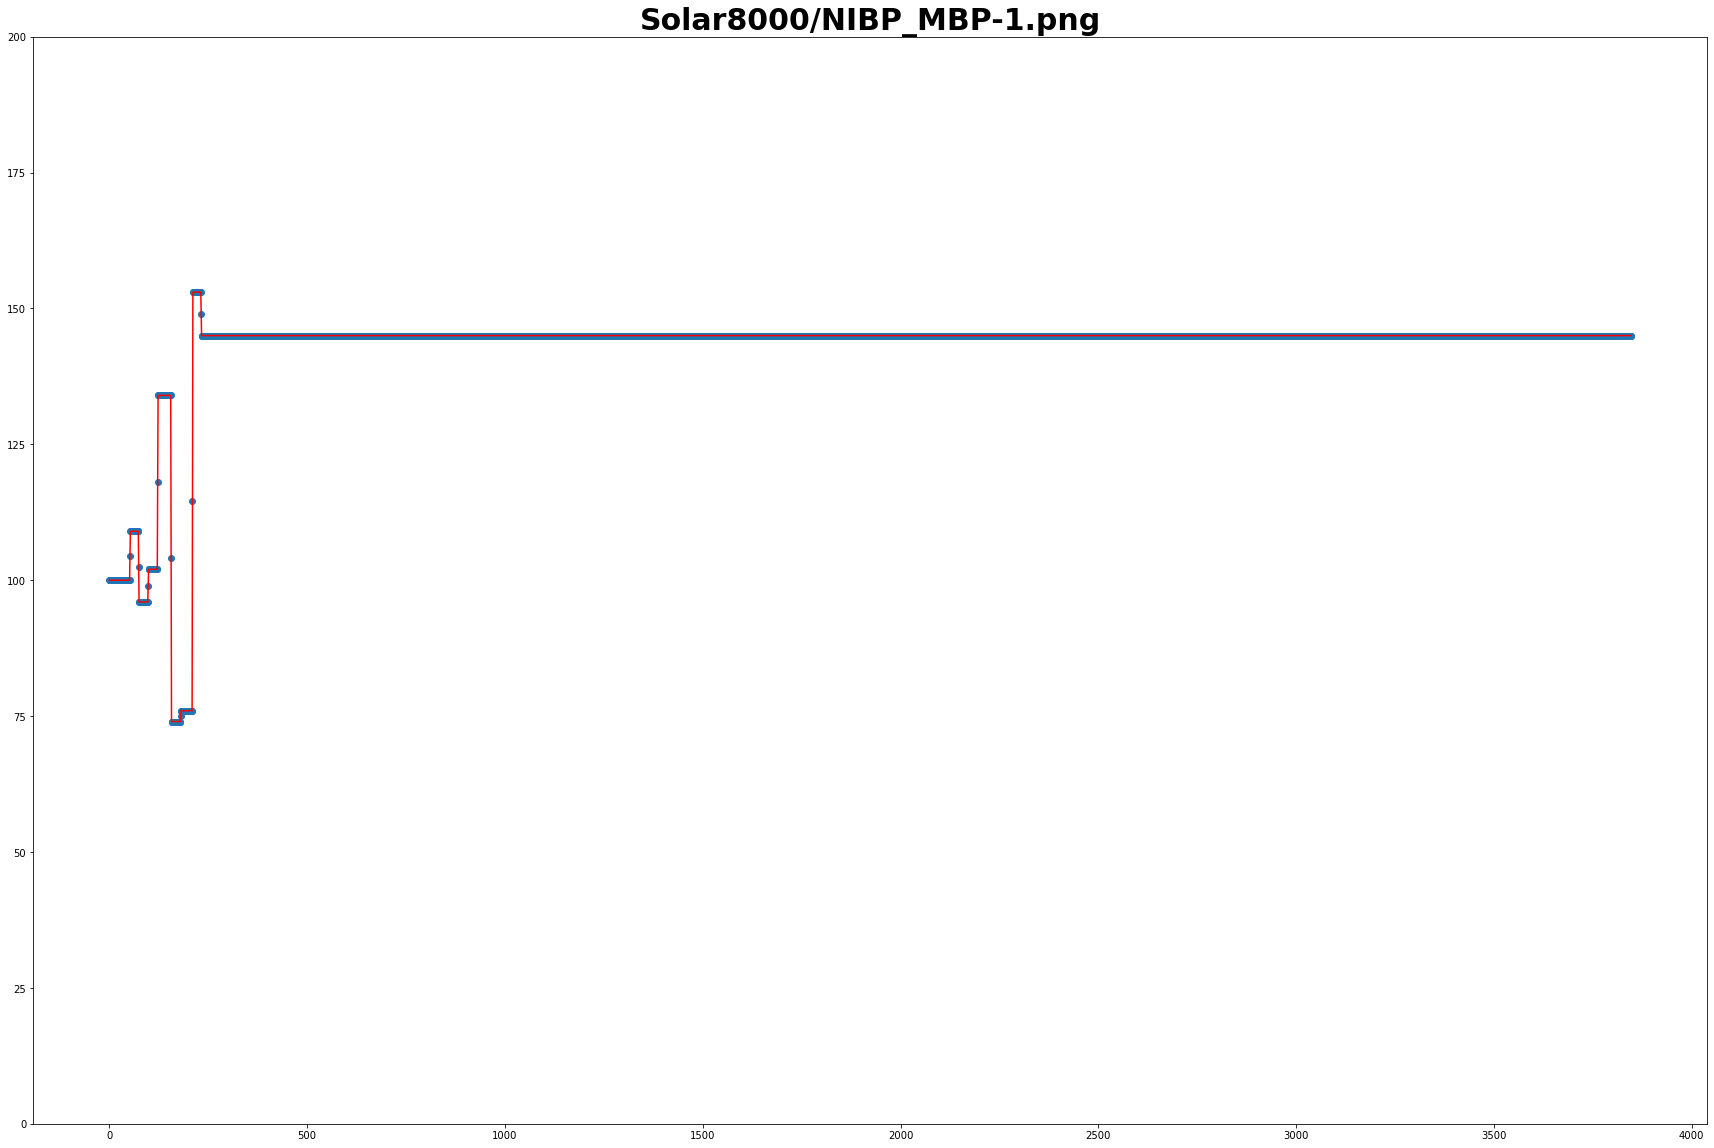

In [31]:
plot_df(new_imp, 'Solar8000/NIBP_MBP', 1)

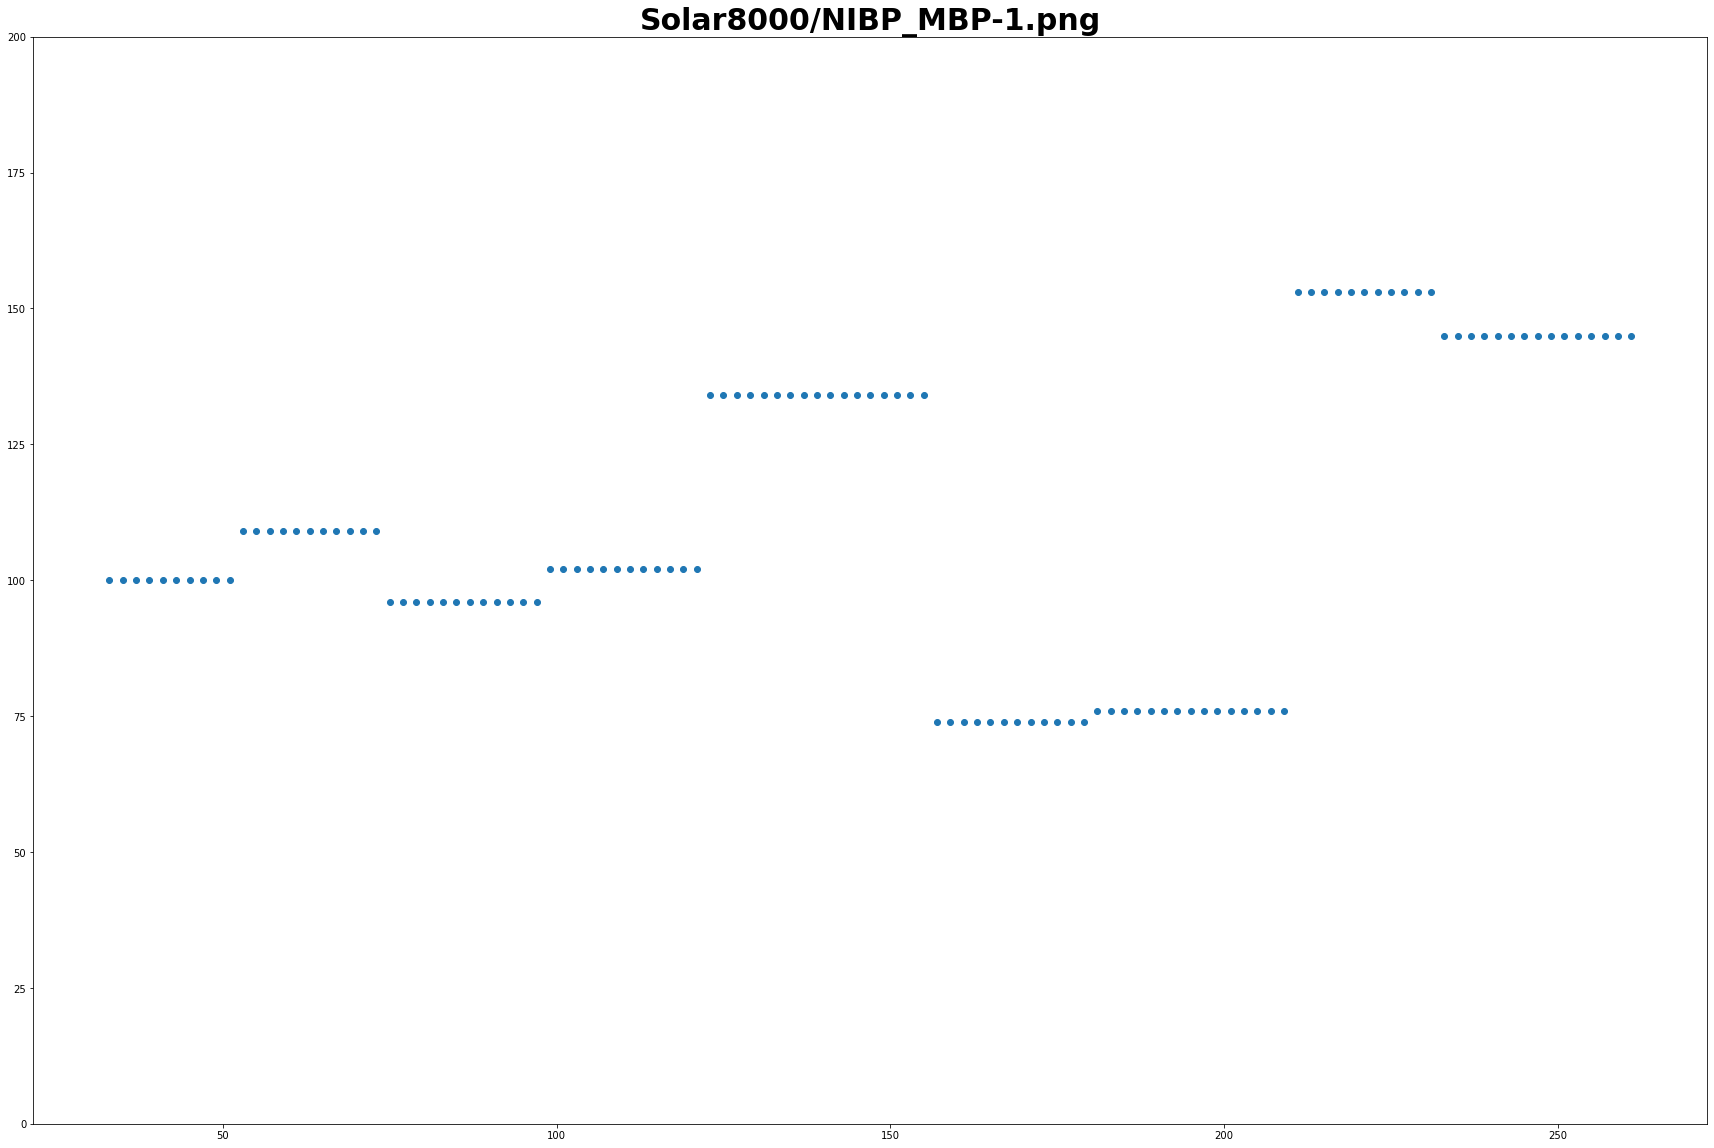

In [32]:
plot_df(small_df, 'Solar8000/NIBP_MBP', 1)

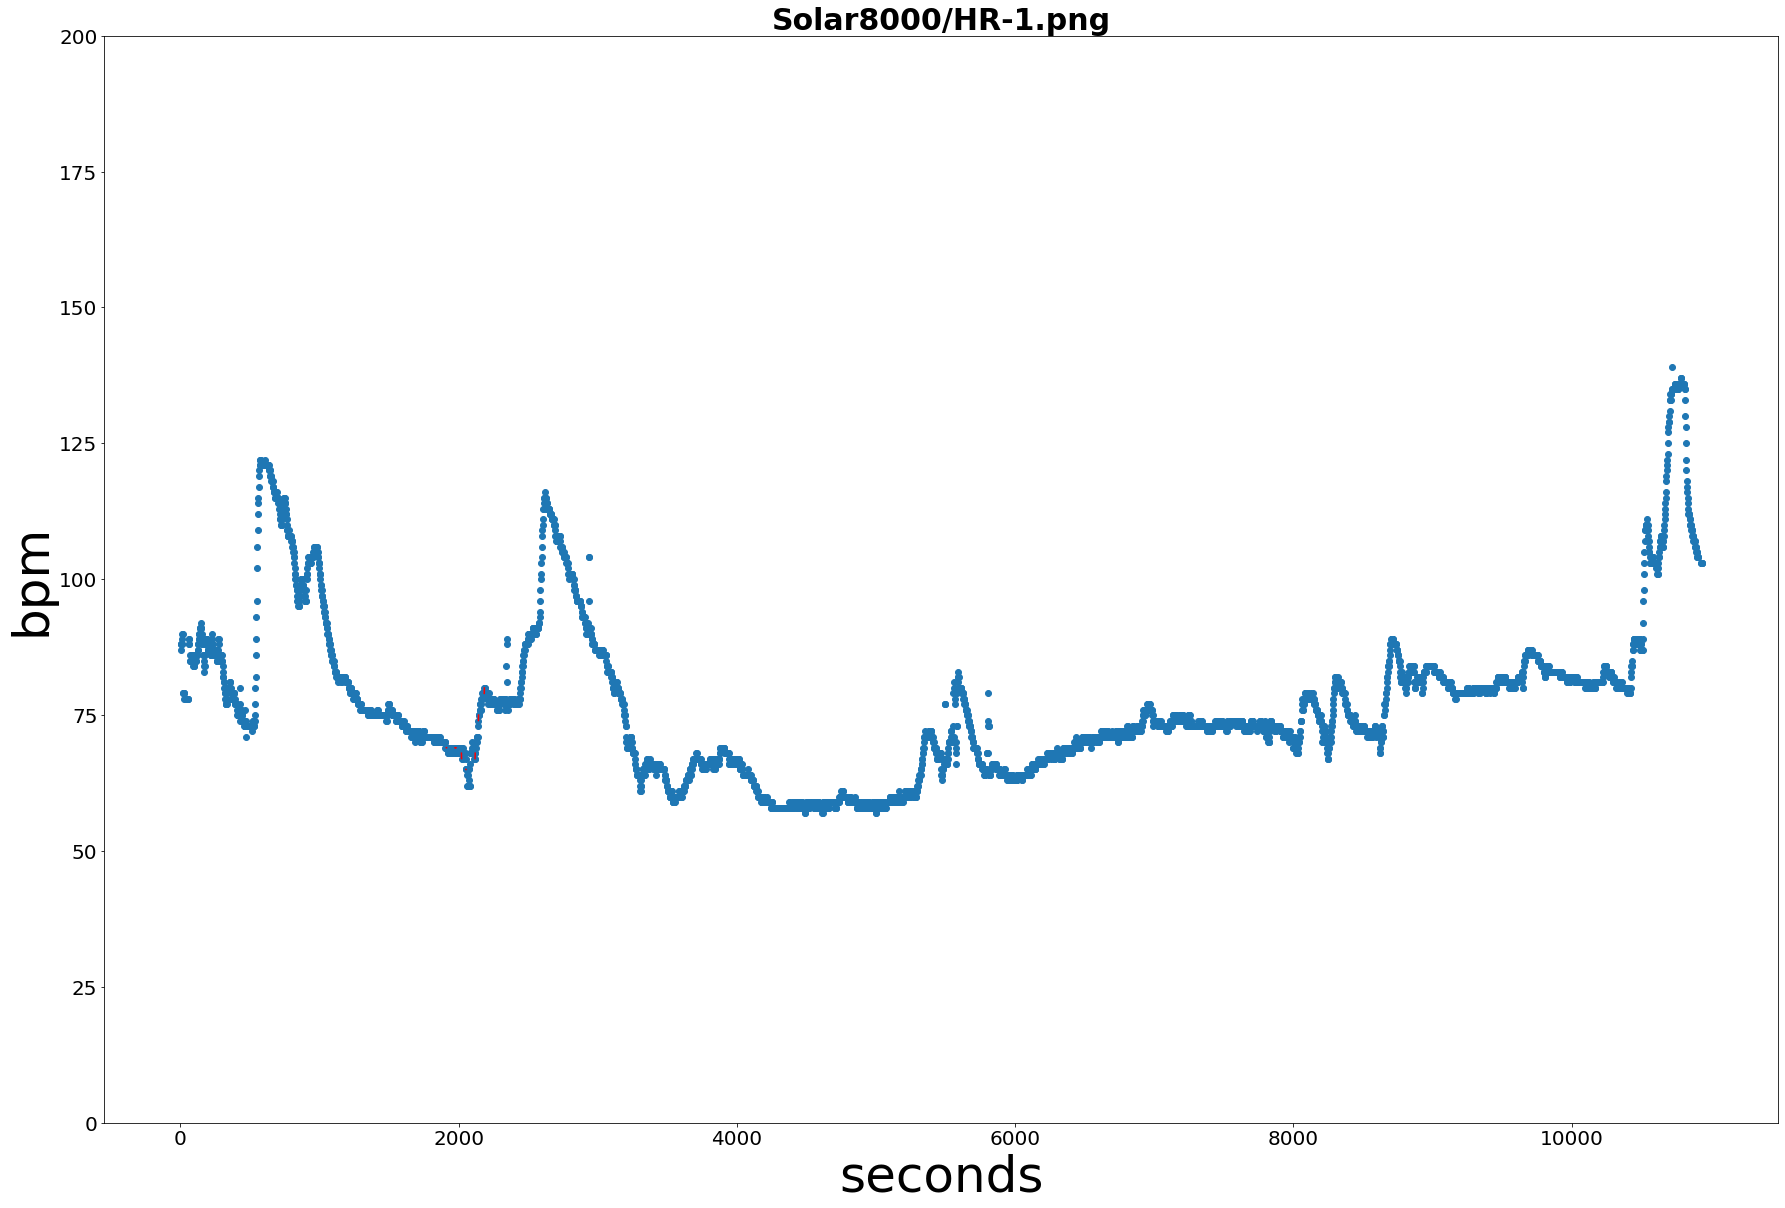

In [100]:
plot_df(merged_df, 'Solar8000/HR',1 )

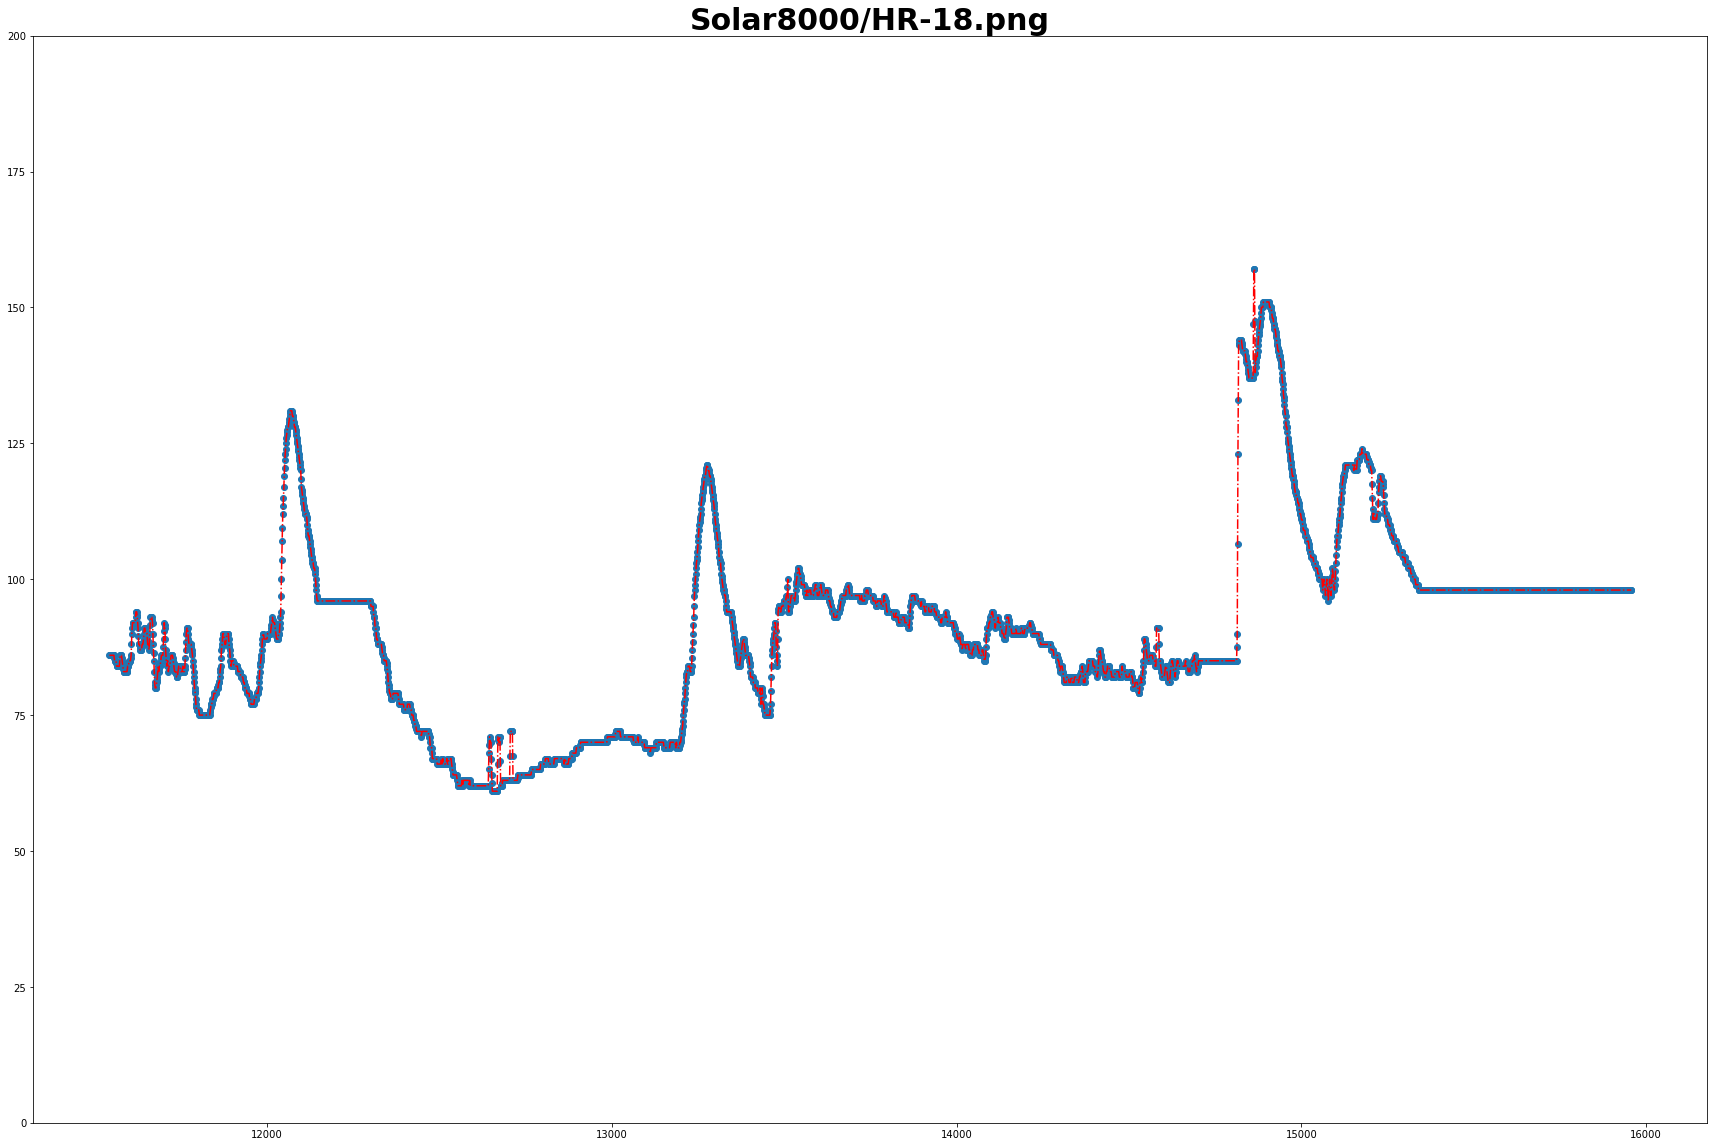

In [41]:
plot_df(imp_df, 'Solar8000/HR',18 )

In [ ]:
imp_df[imp_df['caseid'].eq(6236)].tail(50)

## Explore missingness in vital data only

In [11]:
# Loading vital colorectal data
abdominal_vital_fname = glob.glob(os.path.join(
        rootdir, '*TOSHIBA_HDD/2021_11_17T09_56_37_vitalDB_Vitals_df_vital_Colorectal.csv'))
df_vital = dd.read_csv(abdominal_vital_fname[0]).compute()
df_vital

,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,pID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,NaN,88.0,96.0,NaN,0.0,NaN,1
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,0.0,0.0,100.0,100.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,NaN,NaN,NaN,88.0,96.0,NaN,0.0,NaN,1
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557894,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6385
557895,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,298.0,80.0,NaN,NaN,NaN,6385
557896,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6385
557897,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,283.0,79.0,NaN,NaN,NaN,6385


In [12]:
# Renaming the caseid column
df_vital= df_vital.rename(columns={'pID':'caseid'})
df_vital.info

<bound method DataFrame.info of         Primus/CO2  Primus/ETCO2  Primus/FEO2  Primus/FIO2  Primus/INCO2  \
0              NaN           NaN          NaN          NaN           NaN   
1              0.0           NaN          NaN          NaN           NaN   
2              0.0           NaN          NaN          NaN           NaN   
3              0.0           0.0        100.0        100.0           0.0   
4              0.0           NaN          NaN          NaN           NaN   
...            ...           ...          ...          ...           ...   
557894         0.0           NaN          NaN          NaN           NaN   
557895         0.0           NaN          NaN          NaN           NaN   
557896         0.0           NaN          NaN          NaN           NaN   
557897         0.0           NaN          NaN          NaN           NaN   
557898         NaN           NaN          NaN          NaN           NaN   

        Primus/MAC  Primus/PEEP_MBAR  Primus/RR_CO2  Pr

In [62]:
# Find the percentage of NAs per case
caseids = df_vital['caseid'].unique()
per_case = [df_vital[df_vital.caseid == i] for i in caseids]
print(len(per_case))

1106


In [63]:
percentage_nan = [i.isnull().mean().mean() for i in per_case]

In [64]:
# The max percentage of NAs in a case is 75%, and the min is 59%
print(max(percentage_nan))
print(min(percentage_nan))

0.7517175141242938
0.5932679638425005


In [65]:
# Number of cases with more than 65% NAs is 
vv  = [per_case[i] for i in range(len(caseids)) if(percentage_nan[i] > 0.65)]
print(len(vv))

257


In [23]:
new_imp.loc[new_imp.caseid == 1]

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,death_inhosp,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,aline1,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,seconds,intraop_ebl
0,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,7.0,100.0,0.0,21.00,30.0,89.0,95.0,87.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,1,-1.0
1,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,7.0,100.0,0.0,21.00,30.0,89.0,95.0,87.0,1.0,84.0,100.0,150.0,88.0,96.0,5.0,0.0,18.0,4,-1.0
2,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,7.0,100.0,0.0,21.00,30.0,89.0,95.0,87.5,1.0,84.0,100.0,150.0,88.5,96.0,5.0,0.0,18.0,7,-1.0
3,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,7.0,100.0,0.0,21.00,30.0,89.0,95.0,88.0,1.0,84.0,100.0,150.0,89.0,96.0,5.0,0.0,18.0,10,-1.0
4,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,Left radial,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,7.0,100.0,0.0,21.00,30.0,89.0,95.0,89.0,1.0,84.0,100.0,150.0,89.5,96.5,5.0,0.0,18.0,13,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3843,1,5955,0,11520,-540,10860,-540,10380,-236220,627780,0,0,77.0,1,160.2,67.5,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,1

In [66]:
# select the ids of cases with >65% NaN
to_drop = []
for i in range(len(vv)):
    to_drop.append(vv[i].caseid.values[0])

In [18]:
to_drop

[1,
 95,
 116,
 124,
 166,
 174,
 179,
 239,
 243,
 262,
 272,
 292,
 337,
 370,
 384,
 446,
 471,
 477,
 501,
 535,
 538,
 565,
 580,
 612,
 616,
 680,
 687,
 739,
 755,
 830,
 838,
 854,
 859,
 861,
 888,
 937,
 938,
 939,
 958,
 973,
 1055,
 1081,
 1088,
 1130,
 1147,
 1156,
 1201,
 1207,
 1232,
 1311,
 1315,
 1316,
 1367,
 1381,
 1434,
 1438,
 1502,
 1505,
 1517,
 1557,
 1562,
 1567,
 1568,
 1591,
 1598,
 1634,
 1666,
 1753,
 1766,
 1797,
 1864,
 1873,
 1881,
 1905,
 1911,
 1934,
 1946,
 1955,
 2001,
 2012,
 2026,
 2068,
 2107,
 2108,
 2128,
 2201,
 2229,
 2248,
 2265,
 2287,
 2291,
 2302,
 2306,
 2341,
 2345,
 2371,
 2373,
 2389,
 2408,
 2517,
 2549,
 2559,
 2570,
 2571,
 2607,
 2624,
 2630,
 2683,
 2693,
 2712,
 2756,
 2779,
 2820,
 2829,
 2863,
 2895,
 2916,
 2930,
 3015,
 3045,
 3048,
 3050,
 3059,
 3110,
 3128,
 3161,
 3170,
 3176,
 3180,
 3189,
 3216,
 3301,
 3324,
 3333,
 3362,
 3374,
 3398,
 3401,
 3411,
 3413,
 3427,
 3431,
 3440,
 3449,
 3469,
 3518,
 3522,
 3532,
 3535,


In [24]:
# Drop these caseids from new_imp
index_names = new_imp[new_imp['caseid'].isin(to_drop) ].index

In [25]:
new_imp2 = new_imp.drop(index_names) 

In [30]:
# We now have 849 cases, after deleting 257 cases that had vitals with >65% NaN
new_imp2.caseid.nunique()

849

In [53]:
new_imp2.shape

(2696130, 79)

In [28]:
# delete time related variables + aline1
new_imp2 = new_imp2.drop([], axis=1)

In [54]:
# Export new_imp2 dataset

csv_filename = os.path.join(
            "TOSHIBA_HDD", f'{datetime.now().strftime("%Y_%m_%dT%H_%M_%S")}_First_imp_df.csv')
new_imp2.to_csv(csv_filename, encoding='utf-8-sig', index=False)

# Script for shrinked dataset consisting of 849 cases (-257 that have >65% NaN)

In [ ]:
# The aim here is to shrink the original dataset to contain vitals recorded every 2 seconds in order to reduce the 
# number of NaNs that we will impute

In [ ]:
# dont forget to change object to category at the end

In [31]:
# first drop cases with >65% NaN
index_names = merged_df[merged_df['caseid'].isin(to_drop)].index
df = merged_df.drop(index_names) 
df.shape

In [35]:
df = merged_df.drop(index_names) 
df.shape

(8088431, 90)

In [36]:
# Drop time related variables + aline1
df = df.drop(['subjectid', 'casestart', 'caseend', 'anestart', 'aneend', 'opstart',
                           'opend', 'adm', 'dis', 'death_inhosp', 'aline1'], axis=1)

In [38]:
# As before, we end up with 849 cases
df.caseid.nunique()

849

In [ ]:
# This gives the index of the first recorded MBP in the dataset, but ended up not using it
index = df[df['Solar8000/NIBP_MBP'].notnull()].iloc[0].name 

In [159]:
df.caseid.unique()

array([  18,   21,   30,   33,   50,   57,   62,   63,   71,   88,   90,
        100,  109,  127,  129,  133,  135,  140,  159,  173,  192,  194,
        196,  207,  211,  212,  220,  223,  224,  228,  230,  238,  240,
        245,  248,  269,  288,  289,  298,  302,  305,  311,  313,  320,
        323,  329,  331,  340,  341,  346,  351,  356,  364,  376,  410,
        420,  424,  428,  429,  454,  459,  465,  476,  479,  482,  483,
        487,  489,  498,  503,  504,  508,  511,  517,  525,  528,  529,
        534,  548,  551,  555,  556,  569,  581,  583,  588,  591,  598,
        600,  606,  608,  613,  618,  640,  647,  651,  653,  664,  681,
        682,  695,  696,  707,  710,  713,  718,  724,  735,  780,  782,
        799,  801,  804,  805,  808,  820,  823,  832,  834,  839,  851,
        856,  865,  873,  893,  897,  898,  903,  924,  927,  930,  941,
        951,  960,  961,  962,  965,  966,  975,  978,  982, 1000, 1011,
       1014, 1021, 1026, 1028, 1082, 1086, 1104, 11

In [213]:
# KEEP intraop SOLAR that is more frequently recorded
df[df['caseid'].eq(924)].head(300)

,caseid,icu_days,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,aline1,intraop_ebl,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,seconds
1430507,924,0,66.0,1,165.8,70.9,25.8,2.0,0,General surgery,Colorectal,Colon cancer,Low anterior resection,Videoscopic,Lithotomy,General,1,1,Normal Sinus Rhythm,Mild restrictive,13.7,280.0,109.0,28.6,140.0,4.1,284.0,3.8,34.0,52.0,11.0,0.88,NaN,Oral,7.5,Left forearm,NaN,300.0,50.0,0,0,1950.0,0,130,0.0,0,100,0,0,0,0,0,287.0,10.0,4.152778,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1430508,924,0,66.0,1,165.8,70.9,25.8,2.0,0,General surgery,Colorectal,Colon cancer,Low anterior resection,Videoscopic,Lithotomy,General,1,1,Normal Sinus Rhythm,Mild restrictive,13.7,280.0,109.0,28.6,140.0,4.1,284.0,3.8,34.0,52.0,11.0,0.88,NaN,Oral,7.5,Left forearm,NaN,300.0,50.0,0,0,1950.0,0,130,0.0,0,100,0,0,0,0,0,287.0,10.0,4.152778,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1430509,924,0,66.0,1,165.8,70.9,25.8,2.0,0,General surgery,Colorectal,Colon cancer,Low anterior resection,Videoscopic,Lithotomy,General,1,1,Normal Sinus Rhythm,Mild restrictive,13.7,280.0,109.0,28.6,140.0,4.1,284.0,3.8,34.0,52.0,11.0,0.88,NaN,Oral,7.5,Left forearm,NaN,300.0,50.0,0,0,1950.0,0,130,0.0,0,100,0,0,0,0,0,287.0,10.0,4.152778,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1430510,924,0,66.0,1,165.8,70.9,25.8,2.0,0,General surgery,Colorectal,Colon cancer,Low anterior resection,Videoscopic,Lithotomy,General,1,1,Normal Sinus Rhythm,Mild restrictive,13.7,280.0,109.0,28.6,140.0,4.1,284.0,3.8,34.0,52.0,11.0,0.88,NaN,Oral,7.5,Left forearm,NaN,300.0,50.0,0,0,1950.0,0,130,0.0,0,100,0,0,0,0,0,287.0,10.0,4.152778,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,101.0,123.0,192.0,88.0,98.0,NaN,NaN,NaN,4
1430511,924,0,66.0,1,165.8,70.9,25.8,2.0,0,General surgery,Colorectal,Colon cancer,Low anterior resection,Videoscopic,Lithotomy,General,1,1,Normal Sinus Rhythm,Mild restrictive,13.7,280.0,109.0,28.6,140.0,4.1,284.0,3.8,34.0,52.0,11.0,0.88,NaN,Oral,7.5,Left forearm,NaN,300.0,50.0,0,0,1950.0,0,130,0.0,0,100,0,0,0,0,0,287.0,10.0,4.152778,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1430512,924,0,66.0,1,165.8,70.9,25.8,2.0,0,General surgery,Colorectal,Colon cancer,Low anterior resection,Videoscopic,Lithotomy,General,1,1,Normal Sinus Rhythm,Mild restrictive,13.7,280.0,109.0,28.6,140.0,4.1,284.0,3.8,34.0,52.0,11.0,0.88,NaN,Oral,7.5,Left forearm,NaN,300.0,50.0,0,0,1950.0,0,130,0.0,0,100,0,0,0,0,0,287.0,10.0,4.152778,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.0,NaN,101.0,123.0,192.0,86.0,98.0,NaN,NaN,NaN,6
1430513,924,0,66.0,1,165.8,70.9,25.8,2.0,0,General surgery,Colorectal,Colon cancer,Low anterior resection,Videoscopic,Lithotomy,General,1,1,Normal Sinus Rhythm,Mild restrictive,13.7,280.0,109.0,28.6,140.0,4.1,284.0,3.8,34.0,52.0,11.0,0.88,NaN,Oral,7.5,Left forearm,NaN,300.0,50.0,0,0,1950.0,0,130,0.0,0,100,0,0,0,0,0,287.0,10.0,4.152778,0.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1430514,924,0,66.0,1,165.8,

In [214]:
# This shows the seconds of the operation for a particular patient where MBP was recorded -which is indeed every 2 seconds
df.seconds[df['Solar8000/NIBP_MBP'].notnull()].loc[df['caseid'].eq(640)].head(500)

1027016      88
1027018      90
1027020      92
1027022      94
1027024      96
1027026      98
1027028     100
1027030     102
1027032     104
1027034     106
1027036     108
1027038     110
1027040     112
1027042     114
1027044     116
1027046     118
1027048     120
1027050     122
1027052     124
1027054     126
1027056     128
1027058     130
1027060     132
1027062     134
1027064     136
1027066     138
1027068     140
1027070     142
1027072     144
1027074     146
1027076     148
1027078     150
1027080     152
1027082     154
1027084     156
1027086     158
1027088     160
1027090     162
1027092     164
1027094     166
1027096     168
1027098     170
1027100     172
1027102     174
1027104     176
1027106     178
1027108     180
1027110     182
1027112     184
1027114     186
1027116     188
1027118     190
1027120     192
1027122     194
1027124     196
1027126     198
1027128     200
1027130     202
1027132     204
1027134     206
1027136     208
1027138     210
1027140 

In [39]:
# Missing percentage per column in the original dataset
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
caseid,caseid,0.000000
icu_days,icu_days,0.000000
age,age,0.000000
sex,sex,0.000000
height,height,0.000000
weight,weight,0.000000
bmi,bmi,0.000000
asa,asa,1.184989
emop,emop,0.000000
department,department,0.000000


In [33]:
shrinked

,caseid,icu_days,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,intraop_ebl,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/BT,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,seconds
0,18,0,77.0,0,155.0,56.9,23.7,2.0,0,General surgery,Colorectal,"Tubulovillous adenoma, rectum",Transanal excision,Open,Prone,General,1,0,Normal Sinus Rhythm,Normal,10.3,200.0,122.0,28.2,143.0,3.8,94.0,3.4,15.0,13.0,11.0,0.90,NaN,Oral,7.0,Right forearm,50.0,NaN,0,0,200.0,0,0,0.0,0,30,0,10,0,0,0,80.0,10.0,2.243056,1.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,98.0,116.0,139.0,188.0,86.0,NaN,NaN,NaN,34
1,18,0,77.0,0,155.0,56.9,23.7,2.0,0,General surgery,Colorectal,"Tubulovillous adenoma, rectum",Transanal excision,Open,Prone,General,1,0,Normal Sinus Rhythm,Normal,10.3,200.0,122.0,28.2,143.0,3.8,94.0,3.4,15.0,13.0,11.0,0.90,NaN,Oral,7.0,Right forearm,50.0,NaN,0,0,200.0,0,0,0.0,0,30,0,10,0,0,0,80.0,10.0,2.243056,1.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.0,NaN,98.0,116.0,139.0,181.0,87.0,NaN,NaN,NaN,36
2,18,0,77.0,0,155.0,56.9,23.7,2.0,0,General surgery,Colorectal,"Tubulovillous adenoma, rectum",Transanal excision,Open,Prone,General,1,0,Normal Sinus Rhythm,Normal,10.3,200.0,122.0,28.2,143.0,3.8,94.0,3.4,15.0,13.0,11.0,0.90,NaN,Oral,7.0,Right forearm,50.0,NaN,0,0,200.0,0,0,0.0,0,30,0,10,0,0,0,80.0,10.0,2.243056,1.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,98.0,116.0,139.0,181.0,87.0,NaN,NaN,NaN,38
3,18,0,77.0,0,155.0,56.9,23.7,2.0,0,General surgery,Colorectal,"Tubulovillous adenoma, rectum",Transanal excision,Open,Prone,General,1,0,Normal Sinus Rhythm,Normal,10.3,200.0,122.0,28.2,143.0,3.8,94.0,3.4,15.0,13.0,11.0,0.90,NaN,Oral,7.0,Right forearm,50.0,NaN,0,0,200.0,0,0,0.0,0,30,0,10,0,0,0,80.0,10.0,2.243056,1.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.0,NaN,98.0,116.0,139.0,181.0,87.0,NaN,NaN,NaN,40
4,18,0,77.0,0,155.0,56.9,23.7,2.0,0,General surgery,Colorectal,"Tubulovillous adenoma, rectum",Transanal excision,Open,Prone,General,1,0,Normal Sinus Rhythm,Normal,10.3,200.0,122.0,28.2,143.0,3.8,94.0,3.4,15.0,13.0,11.0,0.90,NaN,Oral,7.0,Right forearm,50.0,NaN,0,0,200.0,0,0,0.0,0,30,0,10,0,0,0,80.0,10.0,2.243056,1.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,NaN,98.0,116.0,139.0,181.0,87.0,NaN,NaN,NaN,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3213045,6385,0,69.0,1,159.3,62.3,24.6,2.0,0,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,Videoscopic,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,15.2,239.0,114.0,28.7,144.0,4.0,140.0,3.7,18.0,28.0,19.0,0.84,NaN,NaN,7.5,Right forearm,100.0,250.0,0,0,2500.0,0,100,0.0,0,100,0,25,30,0,300,359.0,20.0,19.159722,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,83.0,118.0,106.0,100.0,NaN,NaN,NaN,20076
3213046,6385,0,69.0,1,159.3,62.3,24.6,2.0,0,General surgery,Colorectal,"Colon submucosal tumor, unknown behavior",Ultralow anterior resection,Videoscopic,Lithotomy,General,1,0,Normal Sinus Rhyth

In [49]:
# Missing percentage per column in the shrinked dataset is clearly reduced compared to original 
percent_missing = shrinked.isnull().sum() * 100 / len(shrinked)
missing_value_df = pd.DataFrame({'column_name': shrinked.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
caseid,caseid,0.000000
icu_days,icu_days,0.000000
age,age,0.000000
sex,sex,0.000000
height,height,0.000000
weight,weight,0.000000
bmi,bmi,0.000000
asa,asa,0.911377
emop,emop,0.000000
department,department,0.000000


In [43]:
# Convert to NaN all the values in "Solar8000/NIBP_MBP" out of normal ranges
to_drop = [number for number in shrinked["Solar8000/NIBP_MBP"] if number > 200]
shrinked["Solar8000/NIBP_MBP"].replace(to_drop, np.nan, inplace=True)

/Users/tselanna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [225]:
to_drop = [number for number in shrinked["Solar8000/NIBP_MBP"] if number < 30]
shrinked["Solar8000/NIBP_MBP"].replace(to_drop, np.nan, inplace=True)

In [45]:
shrinked["Solar8000/NIBP_MBP"].min()

31.0

In [46]:
# Convert to NaN all the values in "Solar8000/NIBP_SBP" out of normal ranges
to_drop = [number for number in shrinked["Solar8000/NIBP_SBP"] if number > 250]
shrinked["Solar8000/NIBP_SBP"].replace(to_drop, np.nan, inplace=True)

In [47]:
to_drop = [number for number in shrinked["Solar8000/NIBP_SBP"] if number < 50]
shrinked["Solar8000/NIBP_SBP"].replace(to_drop, np.nan, inplace=True)

In [48]:
# Convert to NaN all the values in "Solar8000/NIBP_DBP" out of normal ranges
to_drop = [number for number in shrinked["Solar8000/NIBP_DBP"] if number > 160]
shrinked["Solar8000/NIBP_DBP"].replace(to_drop, np.nan, inplace=True)

In [50]:
to_drop = [number for number in shrinked["Solar8000/NIBP_DBP"] if number < 20]
shrinked["Solar8000/NIBP_DBP"].replace(to_drop, np.nan, inplace=True)

23.0

In [87]:
# Export shrinked_before_imp dataset

csv_filename = os.path.join(
            "TOSHIBA_HDD", f'{datetime.now().strftime("%Y_%m_%dT%H_%M_%S")}_shrinked_before_imputation.csv')
shrinked.to_csv(csv_filename, encoding='utf-8-sig', index=False)

In [25]:
# Import shrinked_before_imp dataset
shrinked = glob.glob(os.path.join(
        rootdir, 'TOSHIBA_HDD/2022_06_28T16_04_27_shrinked_before_imputation.csv'))
shrinked = pd.read_csv(shrinked[0], dtype={"Solar8000/BT": float})

/Users/tselanna/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
shrinked.caseid.nunique()

849

In [31]:
shrinked['Solar8000/BT'].isna().sum()

1758519

In [22]:
sum(1 for number in shrinked["Solar8000/BT"] if number == 18.200001)

0

In [30]:
shrinked['Solar8000/BT'][shrinked['caseid'].eq()]

7938    NaN
7939    NaN
7940    NaN
7941    NaN
7942    NaN
         ..
13138   NaN
13139   NaN
13140   NaN
13141   NaN
13142   NaN
Name: Solar8000/BT, Length: 5205, dtype: float64

In [16]:
set(shrinked.caseid[shrinked['Solar8000/BT']<0])

set()

In [26]:
shrinked['Solar8000/BT'].value_counts()

36.000000    104182
36.200001    103485
35.900002    102158
36.100002     99161
36.299999     92976
35.799999     92658
35.700001     91469
36.400002     89871
36.500000     66649
35.600002     66543
35.500000     54043
35.400002     49968
36.600002     45961
35.299999     45799
36.700001     33511
35.200001     27144
36.799999     24567
35.100002     22879
36.900002     19348
35.000000     18690
37.000000     17449
37.100002     11685
34.900002     10300
34.799999      9461
37.200001      8818
34.700001      5901
34.600002      5075
34.500000      3306
34.400002      3288
37.400002      2937
37.299999      2907
20.900000      2841
21.000000      2795
21.100000      2755
37.500000      2642
20.700001      2523
20.800001      2445
21.700001      2388
21.200001      2278
34.200001      2125
21.400000      2067
22.000000      2031
21.500000      1911
38.200001      1911
20.600000      1869
22.100000      1830
34.299999      1807
22.200001      1780
21.800001      1772
37.700001      1689


### Interpolate the shrinked dataset

In [14]:
def imputInterp(rootdir, df, method):
    """Imputation techniques"""
    dfs_imp = []
    neighbors = 10

    pID = df['caseid']

    for i in pID.unique():
        cond = df[pID == i]
        df_pat = cond.dropna(how='all', axis=1)
        col = df_pat.columns

        # Interpolation methods
        """Interpolation with different techniques - linear, pad, nearest, polynomial (order=2), spline (order=5), cubic,
    krogh (too slow), piecewise_polynomial, pchip, akima, cubicspline, from_derivatives"""
        if method == "Linear":
            df_lin_interp = df_pat.interpolate(
                method='linear', axis=0).ffill().bfill()
            df_lin_interp = pd.DataFrame(df_lin_interp, columns=col)
            dfs_imp.append(df_lin_interp)
        elif method == "Iterative":
            df_iter_imp = fi.IterativeImputer().fit_transform(df_pat)
            df_iter_imp = pd.DataFrame(df_iter_imp, columns=df_pat.columns)
            dfs_imp.append(df_iter_imp)

    df_imputation = pd.concat(dfs_imp)
    return df_imputation

In [15]:
shrink_imp = imputInterp(rootdir, df=shrinked, method="Linear")

In [20]:
shrink_imp.isna().sum()

caseid               0
icu_days             0
age                  0
sex                  0
height               0
                    ..
Solar8000/VENT_RR    0
seconds              0
cormack              0
intraop_uo           0
Solar8000/BT         0
Length: 79, dtype: int64

In [19]:
shrink_imp = shrink_imp.fillna(-1)

In [21]:
# Export shrink_imp dataset

csv_filename = os.path.join(
            "TOSHIBA_HDD", f'{datetime.now().strftime("%Y_%m_%dT%H_%M_%S")}_shrinked_&_imputed_df.csv')
shrink_imp.to_csv(csv_filename, encoding='utf-8-sig', index=False)

## Script for shrinked dataset consisting of all cases (1106)

In [13]:
# Drop time related variables + aline1
df = merged_df.drop(['subjectid', 'casestart', 'caseend', 'anestart', 'aneend', 'opstart',
                           'opend', 'adm', 'dis', 'death_inhosp', 'aline1'], axis=1)

In [14]:
df.shape

(10421470, 79)

In [42]:
# Missing percentage per column in the original dataset
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
caseid,caseid,0.000000
icu_days,icu_days,0.000000
age,age,0.000000
sex,sex,0.000000
height,height,0.000000
weight,weight,0.000000
bmi,bmi,0.000000
asa,asa,1.398095
emop,emop,0.000000
department,department,0.000000


In [ ]:
# perform ffill to replace NaN with the next value in Solar_8000/BT in order to avoid problems with linear 
# interpolation after shrinking the dataset (keep 1/2 rows where MBP notnull)

In [28]:
df['Solar8000/BT'].isna().sum()

6132134

In [29]:
df['Solar8000/BT'].interpolate(method="ffill", limit_direction='forward', inplace=True)

In [30]:
df['Solar8000/BT'].isna().sum()

2

In [31]:
# create a shrinked dataset that includes MBP values recorded every 2 seconds -aim is to reduce NaNs in Solar8000 variables
df2 = df[df['Solar8000/NIBP_MBP'].notnull()]

In [32]:
df2.caseid.nunique()

1106

In [33]:
df2.shape

(3586392, 79)

In [34]:
df2['Solar8000/BT'].isna().sum()

0

In [ ]:
# Delete cases 5084 and 1753 as the vitals for them were not recorded as the same frequency as MBP, causing NANs
# (as seen in the Interpolation.ipynb)

In [35]:
df2.drop(df2.loc[df['caseid']==5084].index, inplace=True)

/Users/tselanna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
df2.drop(df2.loc[df['caseid']==1753].index, inplace=True)

/Users/tselanna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
df2.caseid.nunique()

1104

In [46]:
df2["Solar8000/NIBP_MBP"].min()

30.0

In [42]:
# Convert to NaN all the values in "Solar8000/NIBP_MBP" out of normal ranges
to_drop = [number for number in df2["Solar8000/NIBP_MBP"] if number > 200]
df2["Solar8000/NIBP_MBP"].replace(to_drop, np.nan, inplace=True)

/Users/tselanna/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [43]:
to_drop = [number for number in df2["Solar8000/NIBP_MBP"] if number < 30]
df2["Solar8000/NIBP_MBP"].replace(to_drop, np.nan, inplace=True)

In [51]:
df2["Solar8000/NIBP_SBP"].min()

50.0

In [49]:
# Convert to NaN all the values in "Solar8000/NIBP_SBP" out of normal ranges
to_drop = [number for number in df2["Solar8000/NIBP_SBP"] if number > 250]
df2["Solar8000/NIBP_SBP"].replace(to_drop, np.nan, inplace=True)

In [50]:
to_drop = [number for number in df2["Solar8000/NIBP_SBP"] if number < 50]
df2["Solar8000/NIBP_SBP"].replace(to_drop, np.nan, inplace=True)

In [52]:
# Convert to NaN all the values in "Solar8000/NIBP_DBP" out of normal ranges
to_drop = [number for number in df2["Solar8000/NIBP_DBP"] if number > 160]
df2["Solar8000/NIBP_DBP"].replace(to_drop, np.nan, inplace=True)

In [53]:
to_drop = [number for number in df2["Solar8000/NIBP_DBP"] if number < 20]
df2["Solar8000/NIBP_DBP"].replace(to_drop, np.nan, inplace=True)

In [54]:
# Export df2 dataset

csv_filename = os.path.join(
            "TOSHIBA_HDD", f'{datetime.now().strftime("%Y_%m_%dT%H_%M_%S")}_1104cases_shrinked_final.csv')
df2.to_csv(csv_filename, encoding='utf-8-sig', index=False)

In [9]:
# Import df2 dataset
df2 = glob.glob(os.path.join(
        rootdir, 'TOSHIBA_HDD/2022_07_06T14_57_48_1104cases_shrinked_final.csv'))
df2 = pd.read_csv(df2[0], dtype={"cormack": 'string'})

In [55]:
df2.shape

(3585370, 79)

In [11]:
df2['Solar8000/NIBP_MBP'].isna().sum()

0

In [56]:
df2['Solar8000/BT'].isna().sum()

0

In [55]:
# Missing percentage per column in the shrinked dataset
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df = pd.DataFrame({'column_name': df2.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
caseid,caseid,0.000000
icu_days,icu_days,0.000000
age,age,0.000000
sex,sex,0.000000
height,height,0.000000
weight,weight,0.000000
bmi,bmi,0.000000
asa,asa,1.009064
emop,emop,0.000000
department,department,0.000000


In [57]:
# Interpolation

def imputInterp(rootdir, df, method):
    """Imputation techniques"""
    dfs_imp = []
    neighbors = 10

    pID = df['caseid']

    for i in pID.unique():
        cond = df[pID == i]
        df_pat = cond.dropna(how='all', axis=1)
        col = df_pat.columns

        # Interpolation methods
        """Interpolation with different techniques - linear, pad, nearest, polynomial (order=2), spline (order=5), cubic,
    krogh (too slow), piecewise_polynomial, pchip, akima, cubicspline, from_derivatives"""
        if method == "linear":
            df_lin_interp = df_pat.interpolate(limit_direction='both')
            df_lin_interp = pd.DataFrame(df_lin_interp, columns=col)
            dfs_imp.append(df_lin_interp)
        elif method == "Iterative":
            df_iter_imp = fi.IterativeImputer().fit_transform(df_pat)
            df_iter_imp = pd.DataFrame(df_iter_imp, columns=df_pat.columns)
            dfs_imp.append(df_iter_imp)

    df_imputation = pd.concat(dfs_imp)
    return df_imputation

In [58]:
df4 = imputInterp(rootdir, df=df2, method="linear")

ValueError: Invalid fill method. Expecting pad (ffill) or backfill (bfill). Got linear

In [21]:
trial = imputInterp(rootdir, df=merged_df, method="Linear")

ValueError: No objects to concatenate

In [ ]:
# intraop_ebl and BT did not get fully imputed

In [28]:
df4.isna().sum()

caseid                         0
icu_days                       0
age                            0
sex                            0
height                         0
weight                         0
bmi                            0
asa                        36189
emop                           0
department                     0
optype                         0
dx                             0
opname                         0
approach                       0
position                  110725
ane_type                       0
preop_htn                      0
preop_dm                       0
preop_ecg                      0
preop_pft                      0
preop_hb                   95395
preop_plt                  89925
preop_pt                  101750
preop_aptt                105736
preop_na                  203798
preop_k                   203798
preop_gluc                 86136
preop_alb                  97370
preop_ast                  86136
preop_alt                  86136
preop_bun 

In [30]:
df4.caseid[df4['Solar8000/BT'].isna()].unique()

array([   1,   18,   33,  174,  329,  410,  420,  501,  612,  735,  804,
        888,  893,  937,  938,  958,  965, 1088, 1156, 1223, 1359, 1434,
       1438, 1459, 1517, 1562, 1634, 1666, 1721, 1740, 1753, 1796, 1826,
       1829, 1857, 1860, 1881, 1905, 1911, 1962, 2001, 2032, 2082, 2180,
       2201, 2287, 2306, 2341, 2345, 2347, 2408, 2565, 2624, 2630, 2712,
       2829, 3039, 3045, 3064, 3086, 3110, 3176, 3362, 3374, 3398, 3440,
       3518, 3535, 3620, 3664, 3788, 3801, 3918, 3938, 4007, 4010, 4025,
       4094, 4103, 4130, 4186, 4269, 4376, 4403, 4423, 4437, 4447, 4523,
       4524, 4569, 4627, 4636, 4686, 4711, 4736, 4775, 4845, 4884, 4956,
       5056, 5062, 5081, 5084, 5103, 5221, 5395, 5429, 5452, 5485, 5568,
       5658, 5711, 5767, 5813, 5888, 5972, 6016, 6021, 6059, 6148, 6156,
       6288, 6316])

In [34]:
df4['Solar8000/BT'].isna().sum()

215929

In [31]:
df4[df4['Solar8000/BT'].isna()]

,caseid,icu_days,age,sex,height,weight,bmi,asa,emop,department,optype,dx,opname,approach,position,ane_type,preop_htn,preop_dm,preop_ecg,preop_pft,preop_hb,preop_plt,preop_pt,preop_aptt,preop_na,preop_k,preop_gluc,preop_alb,preop_ast,preop_alt,preop_bun,preop_cr,cormack,airway,tubesize,iv1,intraop_uo,intraop_rbc,intraop_ffp,intraop_crystalloid,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,anedur,extdur,los,Primus/CO2,Primus/ETCO2,Primus/FEO2,Primus/FIO2,Primus/INCO2,Primus/MAC,Primus/PEEP_MBAR,Primus/RR_CO2,Primus/SET_FIO2,Primus/SET_INTER_PEEP,Solar8000/ETCO2,Solar8000/FEO2,Solar8000/FIO2,Solar8000/HR,Solar8000/INCO2,Solar8000/NIBP_DBP,Solar8000/NIBP_MBP,Solar8000/NIBP_SBP,Solar8000/PLETH_HR,Solar8000/PLETH_SPO2,Solar8000/RR_CO2,Solar8000/VENT_MAWP,Solar8000/VENT_RR,seconds,intraop_ebl,Solar8000/BT
0,1,0,77.0,1,160.2,67.50,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,0.0,100.0,0.0,30.0,89.0,95.0,84.0,1.0,84.0,100.0,150.0,85.0,97.0,5.0,0.0,18.0,96,NaN,NaN
1,1,0,77.0,1,160.2,67.50,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,0.0,100.0,0.0,30.0,89.0,95.0,84.0,1.0,84.0,100.0,150.0,84.0,97.0,5.0,0.0,18.0,98,NaN,NaN
2,1,0,77.0,1,160.2,67.50,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,0.0,100.0,0.0,30.0,89.0,95.0,84.0,1.0,84.0,100.0,150.0,85.0,97.0,5.0,0.0,18.0,100,NaN,NaN
3,1,0,77.0,1,160.2,67.50,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,0.0,100.0,0.0,30.0,89.0,95.0,85.0,1.0,84.0,100.0,150.0,85.0,97.0,5.0,0.0,18.0,102,NaN,NaN
4,1,0,77.0,1,160.2,67.50,26.3,2.0,0,General surgery,Colorectal,Rectal cancer,Low anterior resection,Open,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,14.1,189.0,94.0,33.2,141.0,3.1,134.0,4.3,18.0,16.0,10.0,0.82,I,Oral,7.5,Right forearm,300.0,0,0,350.0,0,120,0.0,100,70,0,10,0,0,0,190.0,8.0,7.145833,0.0,0.0,100.0,100.0,0.0,0.0,1.0,0.0,100.0,0.0,30.0,89.0,95.0,85.0,1.0,84.0,100.0,150.0,86.0,97.0,5.0,0.0,18.0,104,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3523849,6316,0,50.0,1,167.3,74.35,26.6,2.0,0,General surgery,Colorectal,"Colon cancer, rectosigmoid",Low anterior resection,Videoscopic,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,15.3,235.0,129.0,34.2,142.0,4.0,98.0,4.1,19.0,30.0,18.0,0.89,I,Oral,7.5,Left forearm,200.0,0,0,700.0,0,120,0.0,100,80,0,20,0,0,0,165.0,10.0,6.500000,43.0,33.0,29.0,34.0,0.0,0.8,5.0,10.0,40.0,5.0,32.0,29.0,34.0,66.0,0.0,68.0,83.0,112.0,65.0,99.0,10.0,7.0,10.0,1913,NaN,NaN
3523850,6316,0,50.0,1,167.3,74.35,26.6,2.0,0,General surgery,Colorectal,"Colon cancer, rectosigmoid",Low anterior resection,Videoscopic,Lithotomy,General,1,0,Normal Sinus Rhythm,Normal,15.3,235.0,129.0,34.2,142.

In [19]:
# Missing percentage per column in the original dataset
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df = pd.DataFrame({'column_name': df2.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
caseid,caseid,0.000000
icu_days,icu_days,0.000000
age,age,0.000000
sex,sex,0.000000
height,height,0.000000
weight,weight,0.000000
bmi,bmi,0.000000
asa,asa,1.009064
emop,emop,0.000000
department,department,0.000000


In [20]:
# Missing percentage per column in the original dataset
percent_missing = df3.isnull().sum() * 100 / len(df3)
missing_value_df = pd.DataFrame({'column_name': df3.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
caseid,caseid,0.000000
icu_days,icu_days,0.000000
age,age,0.000000
sex,sex,0.000000
height,height,0.000000
weight,weight,0.000000
bmi,bmi,0.000000
asa,asa,1.009064
emop,emop,0.000000
department,department,0.000000


In [24]:
# Missing percentage per column in the original dataset
percent_missing = trial.isnull().sum() * 100 / len(trial)
missing_value_df = pd.DataFrame({'column_name': trial.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
caseid,caseid,0.000000
subjectid,subjectid,0.000000
casestart,casestart,0.000000
caseend,caseend,0.000000
anestart,anestart,0.000000
aneend,aneend,0.000000
opstart,opstart,0.000000
opend,opend,0.000000
adm,adm,0.000000
dis,dis,0.000000


In [19]:
sum(1 for number in df3["Solar8000/BT"] if number <0)

0

In [44]:
df4 = df3.fillna(-1)

In [45]:
df4.isna().sum().sum()

0

In [46]:
# Export df4 dataset

csv_filename = os.path.join(
            "TOSHIBA_HDD", f'{datetime.now().strftime("%Y_%m_%dT%H_%M_%S")}_df4_1106cases_imputedd.csv')
df4.to_csv(csv_filename, encoding='utf-8-sig', index=False)